In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display

np.random.seed(42)
pd.options.display.max_columns = None

In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
print(data.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
print(data.describe(include='all'))

                Rank                         Name Platform          Year  \
count   16598.000000                        16598    16598  16327.000000   
unique           NaN                        11493       31           NaN   
top              NaN  Need for Speed: Most Wanted       DS           NaN   
freq             NaN                           12     2163           NaN   
mean     8300.605254                          NaN      NaN   2006.406443   
std      4791.853933                          NaN      NaN      5.828981   
min         1.000000                          NaN      NaN   1980.000000   
25%      4151.250000                          NaN      NaN   2003.000000   
50%      8300.500000                          NaN      NaN   2007.000000   
75%     12449.750000                          NaN      NaN   2010.000000   
max     16600.000000                          NaN      NaN   2020.000000   

         Genre        Publisher      NA_Sales      EU_Sales      JP_Sales  \
count    1

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
None


# Questions of interest:
<br>
<br>
1) Who are the top publishers of all time?  Which of the publishers make the most games and/or the most popular games?
<br>
2) Who are the current top publishers?
<br>
3) How has the share of top 10 titles evolved over time?

### Question 1:

Prepare a DataFrame that is platform-agnostic for titles (one row per publisher-title combo, combining multiple platforms where applicable)

In [6]:
# combine sales for same title across different platforms
sales_platform_agnostic = data.groupby(['Publisher','Name'])['Global_Sales'].agg('sum')
# find the top (up to) 5 titles for each publisher, and their sales
#top_5_titles_by_publisher = sales_platform_agnostic.groupby('Publisher').nlargest(5)
# sum the sales for the top (up to) 5 titles for each publisher
#top_5_title_sums = top_5_titles_by_publisher.groupby('Publisher').agg('sum').sort_values(ascending=False)
#print(top_5_title_sums.head())

Prepare a DataFrame containing the total sales and total titles of each publisher

In [7]:
publisher_sales_titles = sales_platform_agnostic.reset_index().groupby('Publisher')[['Global_Sales','Name']].\
                                    agg({'Name':'count','Global_Sales':'sum'}).sort_values(by='Global_Sales',ascending=False)
print(publisher_sales_titles.head(10))

                              Name  Global_Sales
Publisher                                       
Nintendo                       667       1786.56
Electronic Arts                606       1110.32
Activision                     417        727.46
Sony Computer Entertainment    622        607.50
Ubisoft                        572        474.72
Take-Two Interactive           201        399.54
THQ                            409        340.77
Konami Digital Entertainment   640        283.64
Sega                           480        272.99
Namco Bandai Games             776        254.09


In [8]:
publisher_sales_titles['Short_Name'] = publisher_sales_titles.index
publisher_sales_titles['Short_Name'].replace({'Electronic Arts':'EA','Sony Computer Entertainment':'Sony',\
                                              'Take-Two Interactive':'Take-Two','Konami Digital Entertainment':'Konami',\
                                              'Namco Bandai Games':'Namco'},inplace=True)
publisher_sales_titles['Rank'] = np.arange(1,publisher_sales_titles.shape[0]+1)
publisher_sales_titles['Graph_Label'] = '#'+publisher_sales_titles['Rank'].astype(str)+'\n'+\
                                        publisher_sales_titles['Short_Name'].astype(str)+'\n'+\
                                        publisher_sales_titles['Global_Sales'].map('{:,.0f}'.format)+'M'
publisher_sales_titles['Avg_Sales_per_Title'] = publisher_sales_titles['Global_Sales']/publisher_sales_titles['Name']
print(publisher_sales_titles.head(10))

                              Name  Global_Sales  Short_Name  Rank  \
Publisher                                                            
Nintendo                       667       1786.56    Nintendo     1   
Electronic Arts                606       1110.32          EA     2   
Activision                     417        727.46  Activision     3   
Sony Computer Entertainment    622        607.50        Sony     4   
Ubisoft                        572        474.72     Ubisoft     5   
Take-Two Interactive           201        399.54    Take-Two     6   
THQ                            409        340.77         THQ     7   
Konami Digital Entertainment   640        283.64      Konami     8   
Sega                           480        272.99        Sega     9   
Namco Bandai Games             776        254.09       Namco    10   

                                       Graph_Label  Avg_Sales_per_Title  
Publisher                                                                
Nintendo   

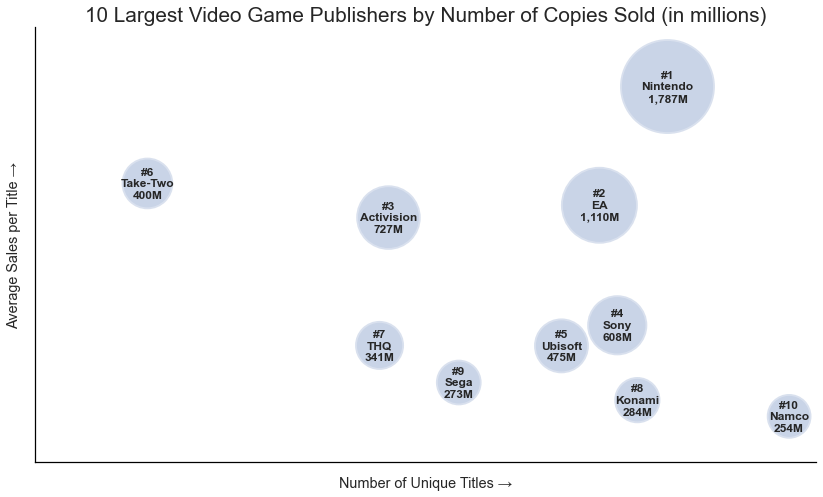

In [9]:
sns.set(rc={'figure.figsize':(14,8),'axes.facecolor':'white','axes.edgecolor':'black','axes.grid':True})

ax = sns.scatterplot(data=publisher_sales_titles.head(10),x='Name',y='Avg_Sales_per_Title',size='Global_Sales',\
                     sizes=(2000,9000),alpha=.3,legend=False)
sns.despine(top=True,right=True)
ax.set_title('10 Largest Video Game Publishers by Number of Copies Sold (in millions)',size='xx-large')
ax.set_xlim(100,800)
ax.set_ylim(0,3.1)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set_xlabel('Number of Unique Titles →',size='large')
ax.set_ylabel('Average Sales per Title →',size='large')
for i in range(0,10):
    ax.text(publisher_sales_titles['Name'].iloc[i],publisher_sales_titles['Avg_Sales_per_Title'].iloc[i],\
            publisher_sales_titles['Graph_Label'].iloc[i],ha='center',va='center',weight='semibold',size='medium')

# Question 2:

How do the standings change when looking at only the latest 5 years in the dataset? (2012-2016, though there are a few records for 2017 and 2020, which may be erroneous but I will assume they belong in the 2012-2016 bucket for simplicity)

In [10]:
# Filter for titles in 2012 and later
data_recent = data.loc[data.Year>=2012]
print(data_recent.shape)

# Make platform-agnostic
recent_sales_platform_agnostic = data_recent.groupby(['Publisher','Name'])['Global_Sales'].agg('sum')

# Get total sales and titles of each publisher
recent_publisher_sales_titles = recent_sales_platform_agnostic.reset_index().groupby('Publisher')[['Global_Sales','Name']].\
                                    agg({'Name':'count','Global_Sales':'sum'}).sort_values(by='Global_Sales',ascending=False)
print(recent_publisher_sales_titles.head(10))

(2747, 11)
                                        Name  Global_Sales
Publisher                                                 
Electronic Arts                           57        207.29
Nintendo                                 111        188.46
Activision                                51        180.52
Ubisoft                                   56        129.49
Take-Two Interactive                      29        122.17
Warner Bros. Interactive Entertainment    29         78.37
Sony Computer Entertainment               55         62.05
Namco Bandai Games                       234         57.58
Microsoft Game Studios                    29         53.40
Square Enix                               44         46.97


In [11]:
recent_publisher_sales_titles['Short_Name'] = recent_publisher_sales_titles.index
recent_publisher_sales_titles['Short_Name'].replace({'Electronic Arts':'EA','Sony Computer Entertainment':'Sony',\
                                              'Take-Two Interactive':'Take-Two','Warner Bros. Interactive Entertainment':\
                                              'Warner\nBros.','Namco Bandai Games':'Namco','Microsoft Game Studios':\
                                              'Microsoft','Square Enix':'Square\nEnix','Activision':'Acti-\nvision'},\
                                              inplace=True)
recent_publisher_sales_titles['Rank'] = np.arange(1,recent_publisher_sales_titles.shape[0]+1)
recent_publisher_sales_titles['Graph_Label'] = '#'+recent_publisher_sales_titles['Rank'].astype(str)+'\n'+\
                                        recent_publisher_sales_titles['Short_Name'].astype(str)+'\n'+\
                                        recent_publisher_sales_titles['Global_Sales'].map('{:,.0f}'.format)+'M'
recent_publisher_sales_titles['Avg_Sales_per_Title'] = recent_publisher_sales_titles['Global_Sales']/\
                                                       recent_publisher_sales_titles['Name']
print(recent_publisher_sales_titles.head(10))

                                        Name  Global_Sales     Short_Name  \
Publisher                                                                   
Electronic Arts                           57        207.29             EA   
Nintendo                                 111        188.46       Nintendo   
Activision                                51        180.52  Acti-\nvision   
Ubisoft                                   56        129.49        Ubisoft   
Take-Two Interactive                      29        122.17       Take-Two   
Warner Bros. Interactive Entertainment    29         78.37  Warner\nBros.   
Sony Computer Entertainment               55         62.05           Sony   
Namco Bandai Games                       234         57.58          Namco   
Microsoft Game Studios                    29         53.40      Microsoft   
Square Enix                               44         46.97   Square\nEnix   

                                        Rank              Graph_Label  \
Pu

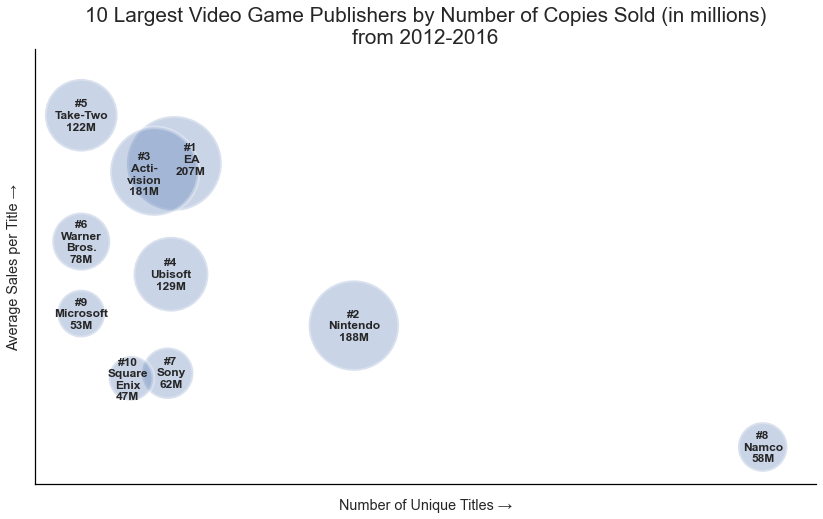

In [12]:
sns.set(rc={'figure.figsize':(14,8),'axes.facecolor':'white','axes.edgecolor':'black','axes.grid':True})

ax = sns.scatterplot(data=recent_publisher_sales_titles.head(10),x='Name',y='Avg_Sales_per_Title',size='Global_Sales',\
                     sizes=(2000,9000),alpha=.3,legend=False)
sns.despine(top=True,right=True)
ax.set_title('10 Largest Video Game Publishers by Number of Copies Sold (in millions)\nfrom 2012-2016',size='xx-large')
ax.set_xlim(15,250)
ax.set_ylim(-.2,5)
ax.set(xticklabels=[])
ax.set(yticklabels=[])
ax.set_xlabel('Number of Unique Titles →',size='large')
ax.set_ylabel('Average Sales per Title →',size='large')
extra_x = [5,0,-3,0,0,0,1,0,0,-1]
extra_y = [.05,0,-.03,0,0,0,.01,0,0,-.01]
for i in range(0,10):
    ax.text(recent_publisher_sales_titles['Name'].iloc[i]+extra_x[i],\
            recent_publisher_sales_titles['Avg_Sales_per_Title'].iloc[i]+extra_y[i],\
            recent_publisher_sales_titles['Graph_Label'].iloc[i],ha='center',va='center',weight='semibold',size='medium')

# Question 3:

For each 5-year period in the dataset, what is the share distribution of the top 10 titles?

In [13]:
# check if any titles from the same publisher have records for more than 1 year
unique_yr_per_title_pub = data.groupby(['Name','Publisher'])['Year'].nunique()
print(unique_yr_per_title_pub.loc[unique_yr_per_title_pub>1].shape)
print(unique_yr_per_title_pub.loc[unique_yr_per_title_pub>1].value_counts())

(521,)
2    497
3     24
Name: Year, dtype: int64


In [14]:
# There are many cases of same publisher/title combo spanning multiple years, driven by different timing of release for
# different platforms. Adjusting for this by finding the earliest year for each publisher/title combo and binning based on that.
earliest_yr = data.groupby(['Name','Publisher']).agg({'Year':'min','Global_Sales':'sum'})

In [15]:
# create new column with time period bins
bins = [1980,1985,1990,1995,2000,2005,2010,3000]
labels = ['1980-84','1985-89','1990-94','1995-99','2000-04','2005-09','2010-16']
earliest_yr['timebin'] = pd.cut(earliest_yr['Year'],bins=bins,right=False,labels=labels)

In [16]:
# get the 10 largest titles per period
top_titles_per_period = earliest_yr.groupby('timebin')['Global_Sales'].nlargest(10)

In [17]:
top_titles_per_period_df = pd.DataFrame(top_titles_per_period).reset_index()

In [18]:
print(top_titles_per_period_df.Publisher.unique())

['Nintendo' 'Atari' 'Activision' 'Enix Corporation' 'Palcom' 'Sega'
 'Capcom' 'Sony Computer Entertainment' 'Electronic Arts'
 'Take-Two Interactive' 'Microsoft Game Studios' 'Bethesda Softworks']


In [19]:
top_titles_per_period_df['Publisher'].replace({'Electronic Arts':'EA','Sony Computer Entertainment':'Sony',\
                                               'Take-Two Interactive':'Take-Two','Microsoft Game Studios':'Microsoft',\
                                               'Enix Corporation':'Enix','Bethesda Softworks':'Bethesda'},inplace=True)

In [20]:
share_of_top = pd.DataFrame(top_titles_per_period_df.groupby('timebin')['Publisher'].value_counts())
share_of_top.rename(columns={'Publisher':'Share'},inplace=True)
share_of_top.reset_index(inplace=True)
share_of_top_pivot = share_of_top.pivot(index='timebin',columns='Publisher',values='Share')
print(share_of_top_pivot.index)
print(share_of_top_pivot.columns)

CategoricalIndex(['1980-84', '1985-89', '1990-94', '1995-99', '2000-04',
                  '2005-09', '2010-16'],
                 categories=['1980-84', '1985-89', '1990-94', '1995-99', '2000-04', '2005-09', '2010-16'], ordered=True, dtype='category', name='timebin')
Index(['Activision', 'Atari', 'Bethesda', 'Capcom', 'EA', 'Enix', 'Microsoft',
       'Nintendo', 'Palcom', 'Sega', 'Sony', 'Take-Two'],
      dtype='object', name='Publisher')


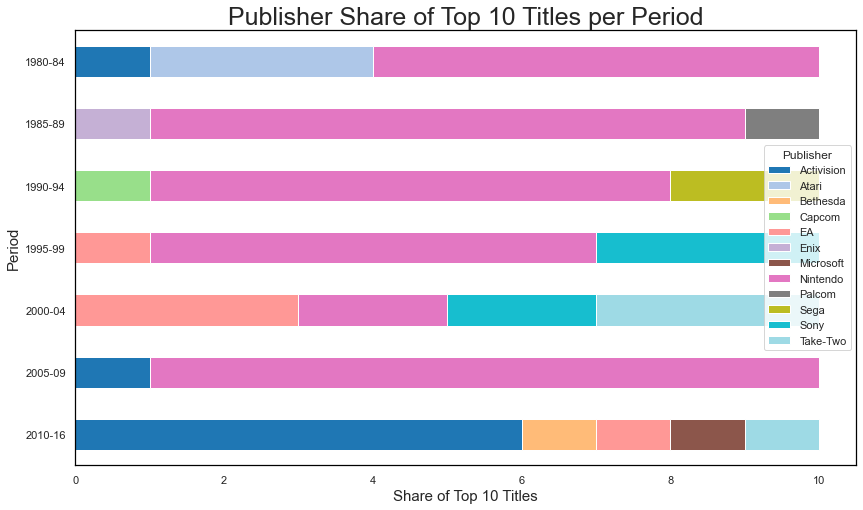

In [37]:
_ = share_of_top_pivot.iloc[::-1].plot(kind='barh',stacked=True,colormap='tab20')
_ = plt.title('Publisher Share of Top 10 Titles per Period',fontdict={'fontsize':25})
_ = plt.ylabel('Period',fontdict={'fontsize':15})
_ = plt.xlabel('Share of Top 10 Titles',fontdict={'fontsize':15})